## Data Wrangling for Google PlayStore App dataset

In [1]:
import pandas as pd
app=pd.read_csv('googleplaystore.csv')
review=pd.read_csv('googleplaystore_user_reviews.csv')
print(review.head())
print(review.shape)
print(review.columns)
print(review.info())
print(len(app.Rating))

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
(64295, 5)
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Ra

It seems that there are missing values in many of the columns of the first dataset. The columns include rating, type, 
content rating, current ver and android ver. Missing values are also observed in the second dataset, in columns: Translated_Review, Sentiment, Sentiment_Polarity
and Sentiment_Subjectivity.

In [2]:
## Two datasets are merged on shared column App. The merged column is named as merge.
## This thrid dataset will be stored as a backup for future use, if needed.
merge=pd.merge(app, review, on='App')
print(merge.head())
print(merge.info())

                   App        Category  Rating Reviews Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
3  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
4  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   

  Price Content Rating                     Genres      Last Updated  \
0     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
3     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
4     0       Everyone  Art & Design;Pretend Play  January 15, 2018   

  Current Ver   Android Ver  \
0       2.0.0  4.0.3 and up   
1       2.0.0  4.0.3 and up   
2    

In [3]:
## For app dataset, rows with missing value (NaN) will be removed and for review dataset, rows with missing values in 
## setiment will be removed. 
new_app=app.dropna(axis=0, how='any')
new_rev=review.dropna(axis=0, how='any')
print(new_app.info())
print(new_rev.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity

In [4]:
## Assert that there is no missing value:
assert pd.notnull(new_app).all().all()
assert pd.notnull(new_rev).all().all()

In [5]:
## Assert that all ratings in new_app are above 0:
assert (new_app['Rating']>0).all().all()

Now both original datasets have been cleaned up to remove missing values and the revised datasets are good to use for 
analysis.

The next step is to check outliers of Ratings, Sentiment_Polarity and Sentiment_Subjectivity from App and Review datasets.First, we want to identify what kinds of distribution each of these three data follows.

Begin with Rating data.

In [6]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(3,2,figsize=(15,15))
plt.subplot(3, 2, 1)
new_app['Rating'].plot(kind='hist')
plt.subplot(3, 2, 2)
new_app['Rating'].plot(kind='box')
plt.subplot(3, 2, 3)
new_rev['Sentiment_Polarity'].plot(kind='hist')
plt.subplot(3, 2, 4)
new_rev['Sentiment_Polarity'].plot(kind='box')
plt.subplot(3, 2, 5)
new_rev['Sentiment_Subjectivity'].plot(kind='hist')
plt.subplot(3, 2, 6)
new_rev['Sentiment_Subjectivity'].plot(kind='box')

plt.show()

<Figure size 1500x1500 with 6 Axes>

It looks like the Rating data is not normally distributed. Instead, the Rating data seems to be left-skewed. We will try to log-transform the data into log(Rating).

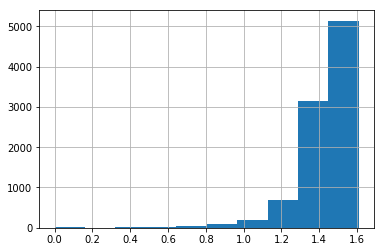

In [7]:
import numpy as np
new_app['Rating'].apply(np.log).hist()

It turned out the log transformation is not a solution to Rating data. Now, let's try exponential transformation on Rating data:

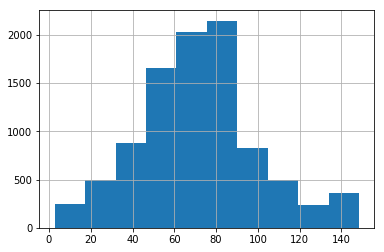

In [8]:
new_app['Rating'].apply(np.exp).hist()

The exponentially transformed Rating data follows normal distribution. Now, let's check if there is any outlier in the transformed Rating data:

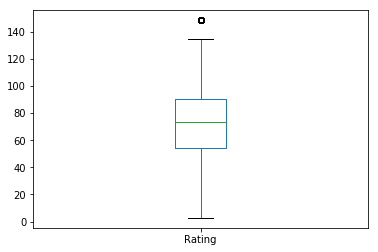

In [9]:
new_app['Rating'].apply(np.exp).plot(kind='box')
plt.show()

It turned out there is indeed outlier in the transformed Rating data. We need to identify this(these) data point(s) before making decision on whether to remove the outliers. The next step is to identify the outlier. 

In [10]:
## Add the transformed Rating data to the dataset, and name it exp_rating.
new_app['exp_rating']=new_app['Rating'].apply(np.exp)

## Define a function to locate outliers: the theory is to find data with difference from sample mean bigger than twice
## the standard deviation
def locate_outliers(data,n):
    return data[abs(data[n] - np.mean(data[n])) > 2 * np.std(data[n])]

C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
locate_outliers(new_app,'exp_rating').head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up,134.28978
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,134.28978
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,134.28978
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up,134.28978
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,"1,000,000+",Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up,134.28978


As we can see from the above table, these suspected outliers dont seem to be not 'wrong' or false input. These ratings are independent from each other and without seeing the detailed review on these apps, there is no strong reason to exclude them. Next, we will locate the 'outliers' for sentiment_polarity data:

In [12]:
locate_outliers(new_rev,'Sentiment_Polarity').head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
13,10 Best Foods for You,Greatest ever Completely awesome maintain heal...,Positive,0.992188,0.866667
19,10 Best Foods for You,One greatest apps.,Positive,1.000000,1.000000


Again, these polarity ratings seem valid, and there is no strong reason to exclude them. Therefore, the detected outliers in App rating and sentiment polarity data will not be excluded in further analysis.

The next data cleaning steps include:1. datetime parsing 2. remove faulty App size 3.remove dollar signs 4. remove megabite signs 5. remove '+' sign in installs

In [13]:
##1. datetime parsing 
from datetime import datetime
new_app[ 'Last Updated' ]=[datetime.strptime(x, '%B %d, %Y') for x in new_app[ 'Last Updated' ]]
print(new_app.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art

C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


During this data cleaning step, abnormal input in App Size is also observed, with non-numerical value of 'Varies with device'. Therefore, the rows with  Size= 'Varies with device' will be removed.

In [14]:
##2. remove faulty App size
new_app = new_app[new_app.Size!= 'Varies with device']

In [15]:
##3.remove dollar signs
new_app[ 'Price' ]=[float(x.strip('$')) for x in new_app.Price]

In [16]:
##4. remove megabyte signs and kilobyte sign
new_app['Size']=[x.strip('M') for x in new_app.Size]
new_app.Size=[float(x.strip('k'))/1000 if 'k' in x else float(x) for x in new_app.Size]

In [19]:
##5. remove '+' sign in installs
new_app[ 'Installs' ]=[x.strip('+')for x in new_app.Installs]
new_app[ 'Reviews' ]=[int(x)for x in new_app.Reviews]
new_app[ 'Installs' ]=[int(x.replace(',','')) if ',' in x else int(x) for x in new_app.Installs]
print(new_app.head(5))
print(new_app.info())

AttributeError: 'int' object has no attribute 'strip'

All of the numeric data has been converted to numeric values for further analysis.

# Exploratory Data Interpretation

### 1. First, we will look into the potential relationship between app ratings and app installs.

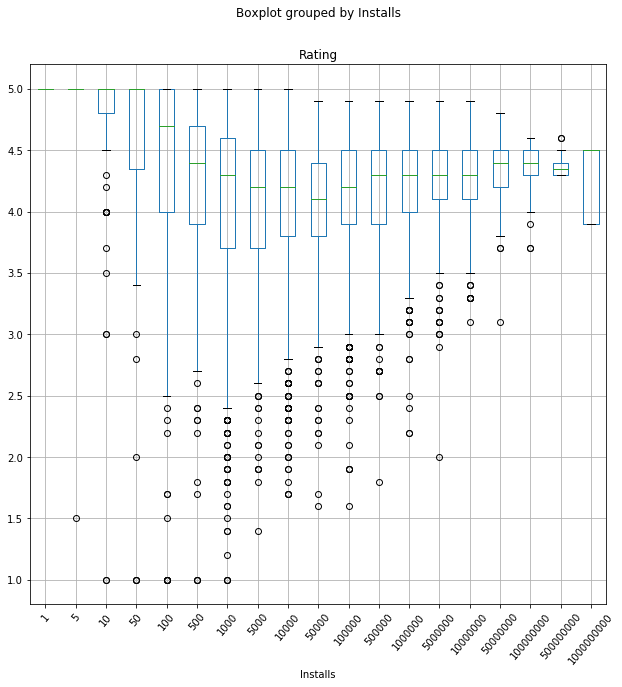

In [20]:
import matplotlib.pyplot as plt
boxplt1=new_app.boxplot(column=['Rating'], by='Installs', figsize=(10,10), rot=50)


As we can se from the plot, the mean of the app ratings did not change significantly with the number of installs.
Now, let's take a look if the average app rating changes with the installs.

Text(0.5, 1.0, 'Average rating vs. number of installs')

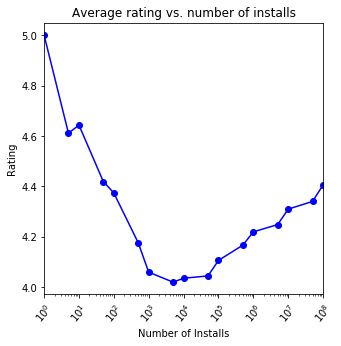

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
new_app.set_index('Installs')
new_app.groupby(['Installs']).mean()['Rating'].plot(kind='line', ax=ax, rot=50, marker='o', color='b')
x_label=new_app['Installs'].unique()
ax.set_xticks(x_label)
ax.set_xscale('log')
plt.xlim(1,100000000,20)
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.title('Average rating vs. number of installs')

The ratings of the app initially decline with the number of installs, for apps with 1 to 10000 installs. We may classify these apps as 'unpopular apps'. For the 'popular apps' with installs above 10000 times, the average app rating goes up with installs.

So what is the most donwloaded app on Google Play Store?

In [22]:
new_app.sort_values(by='Installs', ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,90.017131
3896,Subway Surfers,GAME,4.5,27711703,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,90.017131
3765,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,49.402449
1872,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,90.017131
1917,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,90.017131


The most downloaded app is Samsung Health app, with more than half billion downloads. However, we could not figure out the or third most dowaloaded app because the installs provided in this dataset refers to a categorical interval instead of real numeric value.

### 2. Now let's take a look into the general rating distribution and how each category/genre score on ratings.

C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of App Rating')

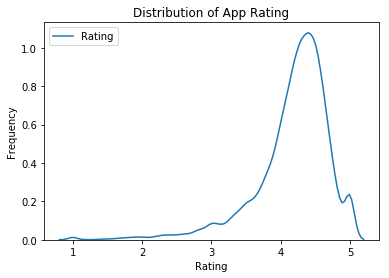

In [23]:
import seaborn as sns
dist = sns.kdeplot(new_app['Rating'])
dist.set_xlabel("Rating")
dist.set_ylabel("Frequency")
plt.title('Distribution of App Rating')

Majority of the apps have a rating of above 4.0. Some apps have really high ratings of >= 4.9, while some apps are rated below 2.0. We will dig into these top rated apps (of above 4.5) and see what genres they fall under.

Text(0.5, 1.0, 'Count of top rated apps in each category')

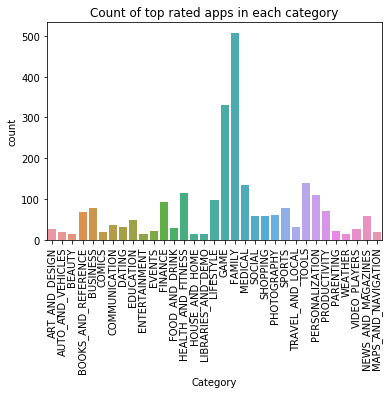

In [24]:
top_rate=new_app.loc[new_app['Rating'] >= 4.5, : ]
toprate = sns.countplot(x="Category",data=top_rate)
toprate.set_xticklabels(toprate.get_xticklabels(), rotation=90)
plt.title('Count of top rated apps in each category')

As we can see from the plot, Family category apps have the most highly rated apps, followed by Game category, then Medical and Tool category.

So how many apps are in each of these categories and what is the percentage of highly rated apps for each category?

Text(0, 0.5, 'Percentage of highly rated apps')

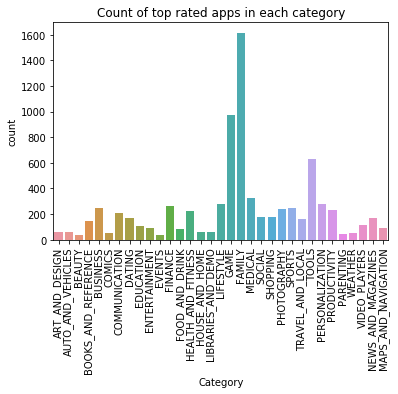

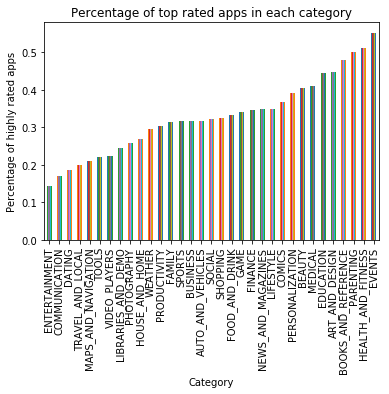

In [25]:

count=sns.countplot(x="Category",data=new_app)
count.set_xticklabels(count.get_xticklabels(), rotation=90)
plt.title('Count of top rated apps in each category')

top_perc=top_rate.groupby('Category').count()/new_app.groupby('Category').count()
top_perc.sort_values('App').plot(kind='bar', legend=False)
plt.title('Percentage of top rated apps in each category')
plt.ylabel('Percentage of highly rated apps')


It turns out that Family, Game and Tool categories also have the most apps, which explained why these three categories also have the most highly rated app. If we normalize the highly rated app nunmbers to the total app numbers, we can see that categories with the most percentage of highly rated apps are Event, Health and Fitness, then Parenting.

### 3. Price vs. Ratings

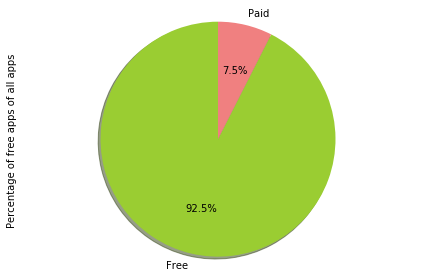

In [26]:
labels = ['Paid', 'Free']
sizes = new_app.groupby('Type').count()
colors = ['yellowgreen', 'lightcoral']
sizes['App'].plot(kind='pie', label= 'Percentage of free apps of all apps', colors=colors, 
                  shadow=True, startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

92.5 % of the apps are free. 

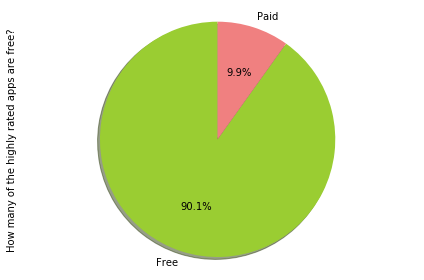

In [27]:
labels = ['Paid', 'Free']
sizes = top_rate.groupby('Type').count()
colors = ['yellowgreen', 'lightcoral']
sizes['App'].plot(kind='pie', label= 'How many of the highly rated apps are free?', 
                  colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

It turns out that 90% of the highly rated apps are free. Price is a potential key factor to a high rating.

Text(0.5, 1.0, 'Distribution of prices in apps')

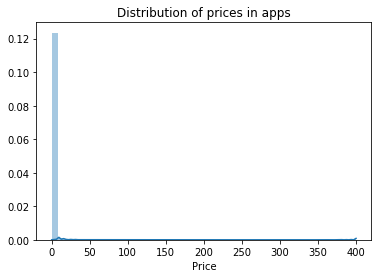

In [28]:
pricedist=sns.distplot(new_app['Price'])
pricedist.set_title('Distribution of prices in apps')

Majority of the app price is between 0 to 50 dollars.

LinregressResult(slope=-0.0010136362801831786, intercept=4.2681657900585686, rvalue=-0.11306360994251746, pvalue=0.006553623047300545, stderr=0.00037147672284472985)

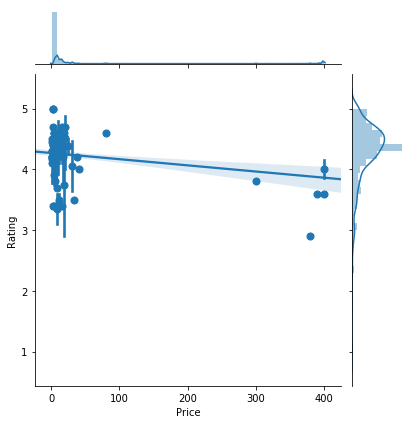

In [29]:
paid=new_app.loc[new_app['Price']>0 ]
price_reg=sns.jointplot(x="Price", y="Rating", data=paid, x_estimator=np.mean, kind='reg')
import scipy
scipy.stats.linregress(paid['Price'],paid['Rating'])

C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


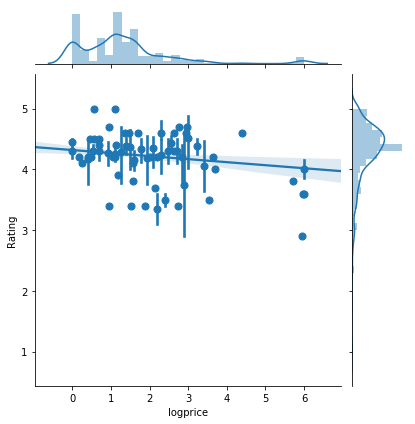

In [30]:
paid['logprice']=paid.Price.apply(np.log)
logprice_reg=sns.jointplot(x="logprice", y="Rating", data=paid, x_estimator=np.mean, kind='reg')

In [31]:
import scipy
scipy.stats.linregress(paid['logprice'],paid['Rating'])

LinregressResult(slope=-0.049885746181053216, intercept=4.317155726100086, rvalue=-0.10355832640629879, pvalue=0.012815457676302527, stderr=0.01998095270884904)

The log transformation did not improve the correlation between price and ratings. It seems that there is a week and negative correlation between price and rating. The rating goes down with price.

### 4. Price vs installs

Text(0, 0.5, 'Price')

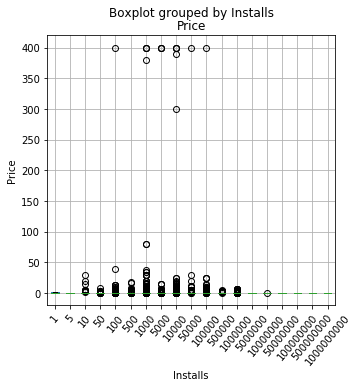

In [32]:
boxplt2=new_app.boxplot(column=['Price'], by='Installs', figsize=(5,5), rot=50)
plt.ylabel('Price')

The most downloaded apps are the apps free of charge.

LinregressResult(slope=-31268.334794089118, intercept=8459346.449412234, rvalue=-0.010852239981282976, pvalue=0.34029877750340976, stderr=32788.61051793716)

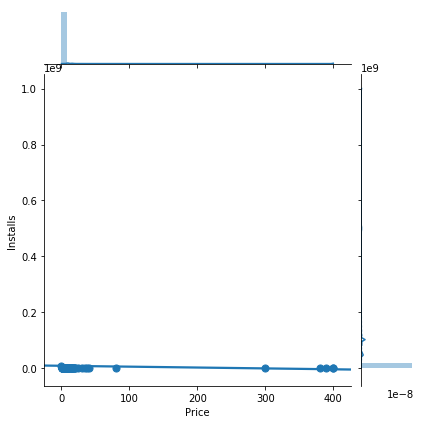

In [33]:
install_reg=sns.jointplot(x="Price", y="Installs", data=new_app, x_estimator=np.mean, kind='reg')
scipy.stats.linregress(new_app['Price'],new_app['Installs'])

However, there is no significant correlation between price of app and download, meaning making the apps free or decreasing the app price does not necessarily make it more popular.

### 5. Reviews and app size vs rating and installs

   Rating  Reviews  Size  Installs
0     4.1      159  19.0     10000
1     3.9      967  14.0    500000
2     4.7    87510   8.7   5000000
3     4.5   215644  25.0  50000000
4     4.3      967   2.8    100000


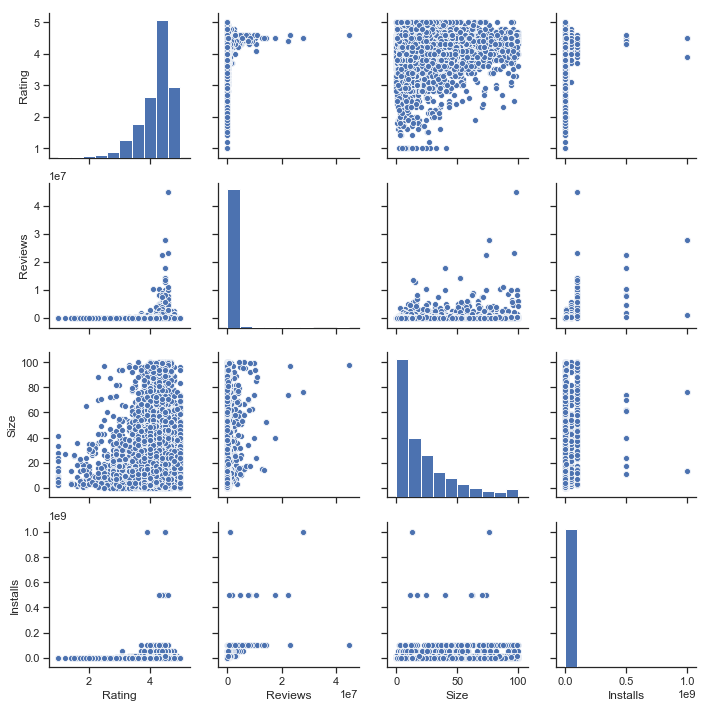

In [34]:
select=new_app[['Rating', 'Reviews', 'Size', 'Installs']]
print(select.head())
sns.set(style="ticks", color_codes=True)
pairsns=sns.pairplot(select)